# Chapter 5: Data Visualization ---- Part C

    ## Overview: 

         5.1 Data Visualization with Matplotlib 
         5.2 Different types of plots
         5.3 Customizing Plots 
         5.4 Data Visualization with Seaborn 

## In this section we will cover the last two parts

    5.3 Customizing Plots 
    5.4 Data Visualization with Seaborn 



### Customizing Plots

    Customzing a plot's legend
     ▪ plot legends are very customizable 
        → aesthetics, position, appearance, ...
     ▪ for a full overview, see the plt.legend documentation

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

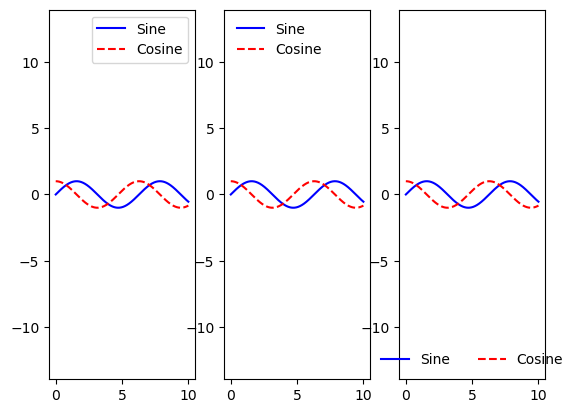

In [31]:
# Create data
x = np.linspace(0, 10, 1000)

# plot setup
fig, ax = plt.subplots(ncols=3)

# def plot function to shorten code:
def legendplot(i):
    ax[i].plot(x, np.sin(x), '-b', label='Sine')
    ax[i].plot(x, np.cos(x), '--r', label='Cosine')
    ax[i].axis('equal');
    
# change theme to default theme
plt.style.use('default')

# plot data with different legends

legendplot(0); ax[0].legend()
legendplot(1); ax[1].legend(loc='upper left', frameon=False)
legendplot(2); ax[2].legend(frameon=False, loc='lower center', ncol=2)
plt.show();

#### Example: Vertically stacked axes

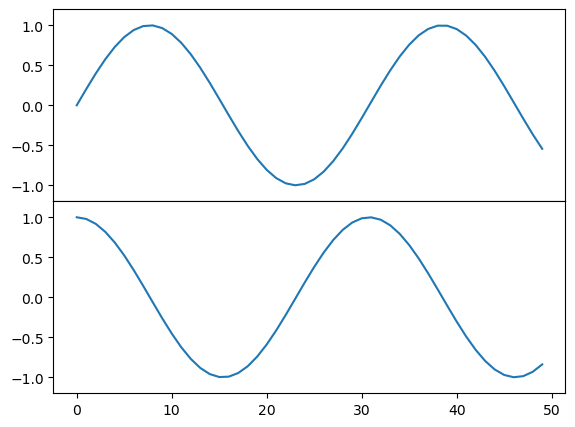

In [32]:
fig = plt.figure()

# .add_axes() method: first is location of subplot within grand plot
#                     [xstart, ystart, width, height]

ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2,1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2,1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
plt.show()

#### Example: More complicated arrangements with plt.GridSpec

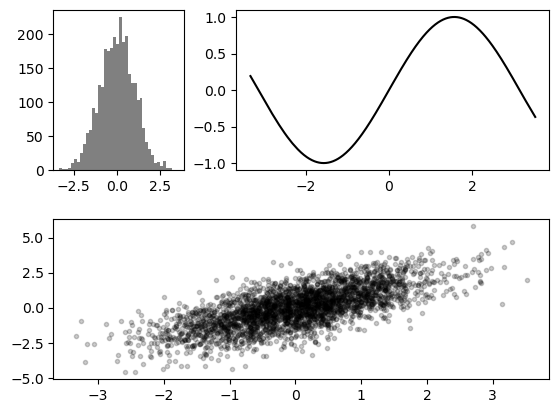

In [45]:
# Create some normally distributed data

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T


# set up axes with .GridSpec()
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)  # 2 stands for rows, 3 is for columns 
# potentially useful options for the grid command: 
#  - suppress x-tick labels (or y-tick, respectively): xticklabels=[]
#  - share y-axis labels (or x-tick, respectively) with main plot: sharey=main_ax

frst_ax = plt.subplot(grid[0, 0])    #first plot: 0,0 stand for first row and first column
scnd_ax = plt.subplot(grid[0, 1:])   #second plot, 1: means use second column and the rest as well
main_ax = plt.subplot(grid[1, :3])   #main plot, :3 means use all 

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2) # plot() option with 'ok' gives the scatter plot

# histogram on firs axes
frst_ax.hist(x, 40, histtype='stepfilled', color='gray')  #40 bins
# random sinus function on second axes
scnd_ax.plot(np.sort(x), np.sin(np.sort(x)), '-k')
# show plot
plt.show();

### Adding text and annotations to plots
    ▪ method plt.text / ax.text with x position, y position, and the text string to add 
      → optional keywords   specifying the color, size, style, alignment, and other properties of the text 
      → useful shorthand: ha/va (horizontal alignment, e. g., ha='right' , ha='top' )
    ▪ see documentation of plt.text() for more information on available options

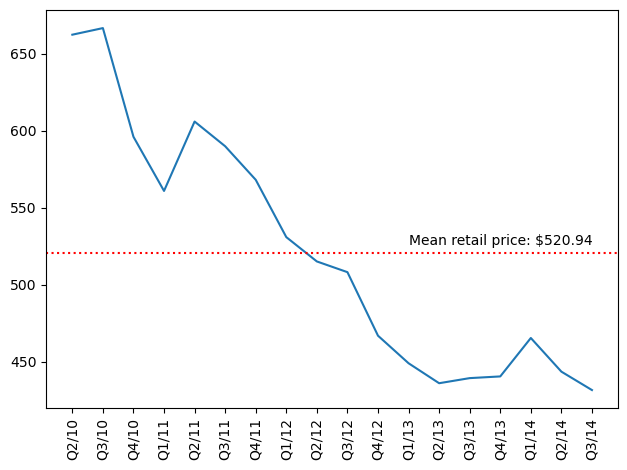

In [64]:
apple = pd.read_csv('/Users/abdulhabirkarahanli/Desktop/Data/apple_average_selling_prices.csv')
apple = apple.dropna()

# compute summary stats

mean_ipad_price = apple['iPad'].mean()
mean_ipad_price_text = 'Mean retail price: $' + str(round(mean_ipad_price, 2))

# plot data, iclude text

plt.plot(apple['Category'], apple['iPad'])
plt.axhline(y=mean_ipad_price, color='r', linestyle=':')
plt.text(11, mean_ipad_price + 5, mean_ipad_price_text, size=10, color='black') #11 is x-axis position, next one is y-axis position.
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Data Visualization with Seaborn

## Seaborn

    Visualization with Seaborn
        ▪ Seaborn provides an API on top of Matplotlib
          → offers sane choices for plot style and color defaults
          → defines simple high-level functions for common statistical plot types 
          → integrates well with the functionality provided by Pandas DataFrames


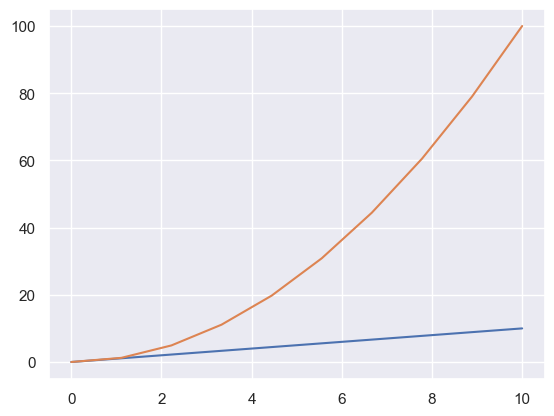

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

x = y = np.linspace(0, 10, num=10)
plt.plot(x, y); plt.plot(x, y**2); # both plots in one life of code

### Histogram: Visualize distribution with kernel density estimation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


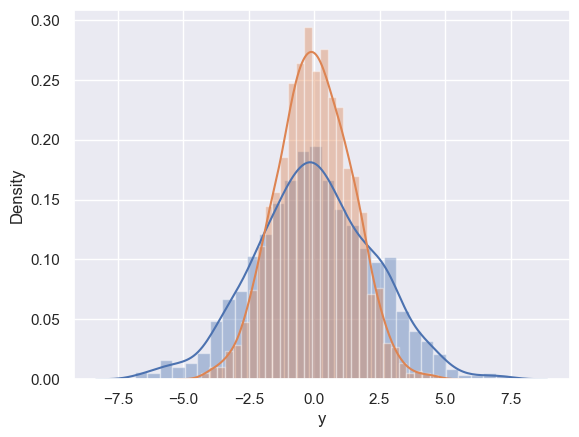

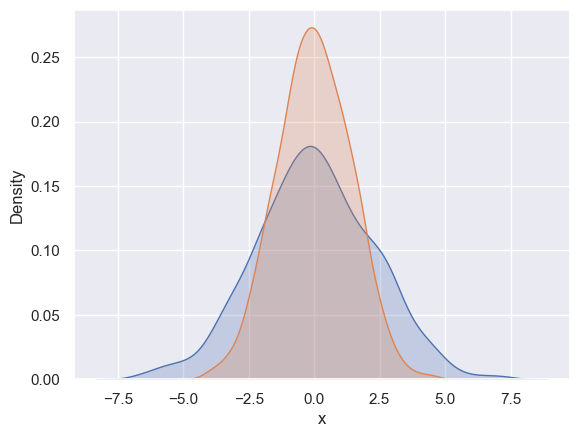

In [79]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# plot only kernel density estimation (kde), look below: 
# sns.kdeplot(data['x'], shade=True)
# sns.kdeplot(data['y'], shade=True)

# plot histogram together with kde

sns.distplot(data['x'])
sns.distplot(data['y']);
plt.show()

sns.kdeplot(data['x'], shade=True)
sns.kdeplot(data['y'], shade=True)
plt.show()

### Joint distribution plots with Seaborn (scatter plots with marginal densities)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


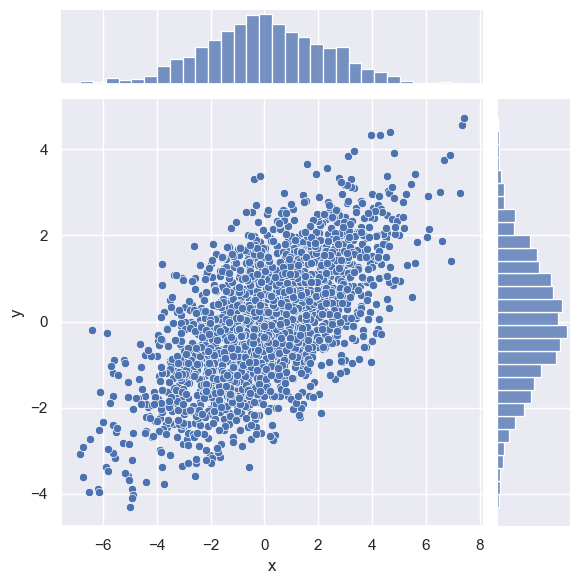

In [81]:
sns.jointplot("x", "y", data)
plt.show()

### A joint distribution plot with a regression fit

In [83]:
# load tips dataset

tips = sns.load_dataset('tips')
tips.head(2)   # smoker: smoker in the party? sex: sex of person who is paying. 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


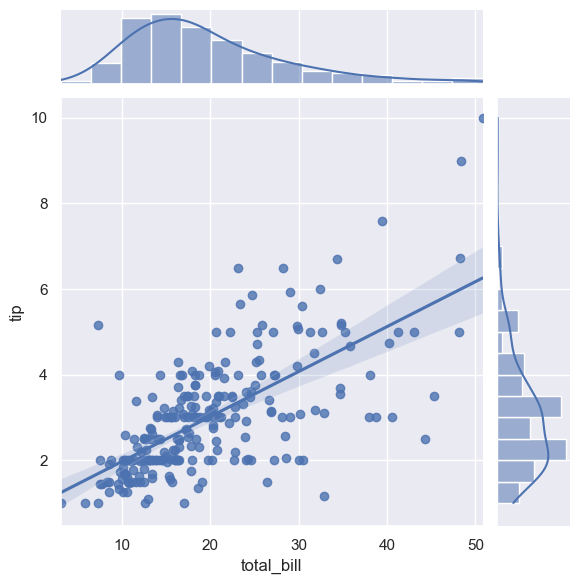

In [84]:
# plot joint distribution of total_bill and tip 
sns.jointplot("total_bill", "tip", data=tips, kind='reg'); plt.show()

### Facetting plots
    Facetting plots with FacetGrid: Displaying results depending on factor levels

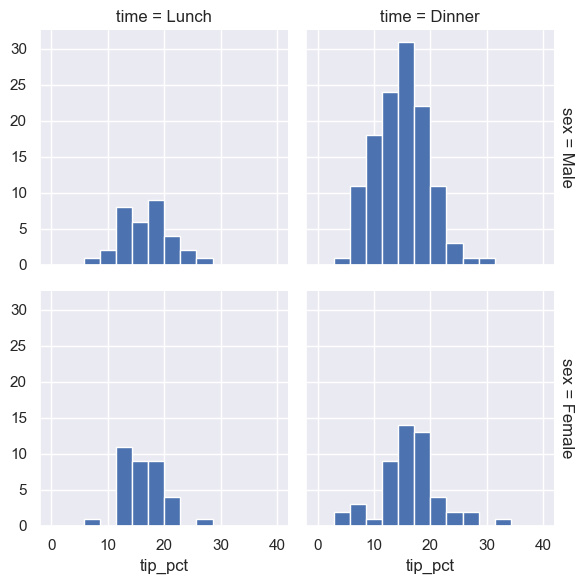

In [93]:
# use tips dataset, create new variable
tips
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips

# plot tips in percent depending on time of day and gender

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));
plt.show()

### Factor plots 

    Factor plots (i.e., grouped boxplots): comparing distributions given discrete factors
    

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


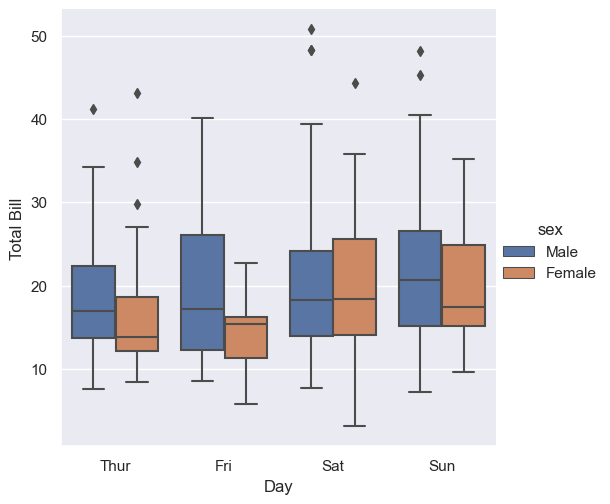

In [98]:
# use tips dataset from before

g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
g.set_axis_labels("Day", "Total Bill");
plt.show()

### Bar plots
    Simple bar plotw (with error bars)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

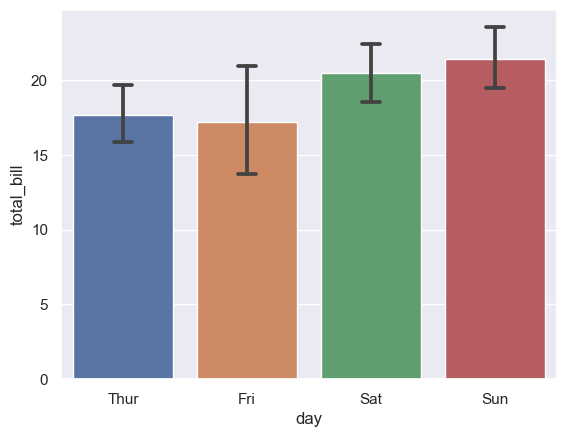

In [100]:
# use tips dataset from before
sns.barplot(x="day", y="total_bill", data=tips, capsize=.15) # capsize --> directly gives errorbars with seaborn

  Grouped bar plots (with error bars)

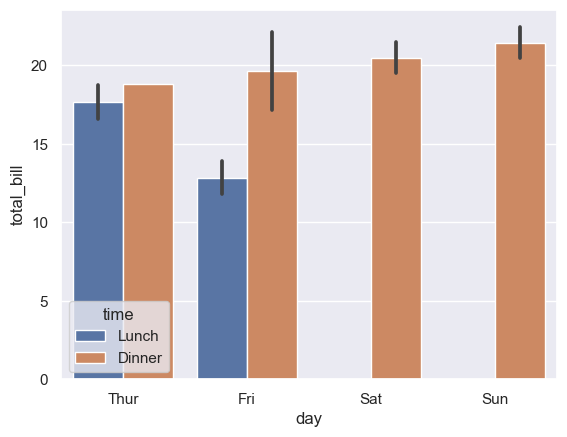

In [106]:
# use tips dataset from before

sns.barplot(x="day", y="total_bill", hue='time', data=tips, ci=68) # ci=68 means approx. one standard error
plt.show()

### Violin plots

    Violin plots to compare distribution

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


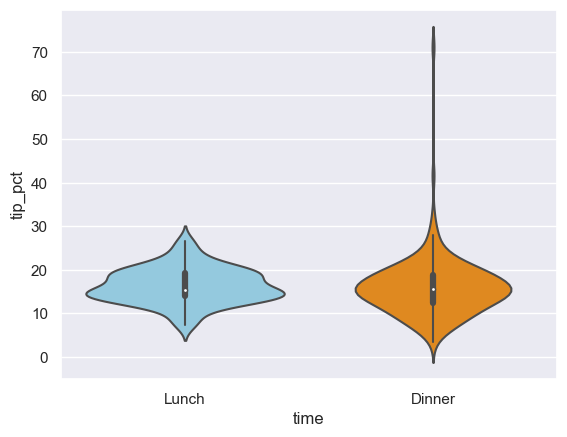

In [111]:
# Violin plot showing the tip percentage by time of day

sns.violinplot("time", "tip_pct", data=tips, palette=["skyblue", "darkorange"]) #palette is used to show the colors
plt.show()

### Regression plots

    Scatter plots with regression lines

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


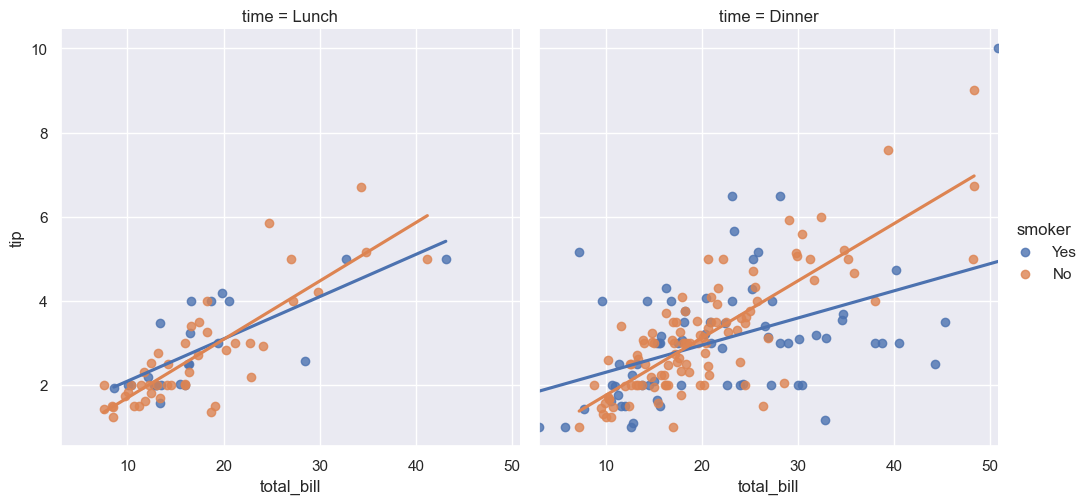

In [113]:
# Regression plot showing the relationship between bill and tip
# by time of day and whether there was a smoker

sns.lmplot('total_bill', 'tip', data=tips, col='time', hue='smoker', ci=None) 
#ci is to check the confidence interval
plt.show()



## Exercise: 

    Load Francis Anscombe’s famous four datasets (the Anscombe quartet) from seaborn (e.g. with df = sns.load_dataset("anscombe")).
    → For every dataset, calculate the mean and standard deviation of ‘x‘ and ‘y‘. Do you notice anything?
    
    → Visualize the data using scatter plots.
        → Include a regression line (without CI).
        → Make the plot in a 2x2 grid. You might find help online on how to achieve that (or just
          have a look at lmplot’s documentation).

In [176]:
# import data

df = sns.load_dataset("anscombe")

dataset1 = df[0:11]
dataset2 = df[11:22]
dataset3 = df[22:33]
dataset4 = df[33:43]

dataset1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [172]:
dataset2.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [173]:
dataset3.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [174]:
dataset4.describe()

,x,y
count,10.000000,10.000000
mean,9.100000,7.562000
std,3.478505,2.129736
min,8.000000,5.250000
25%,8.000000,5.965000
50%,8.000000,7.375000
75%,8.000000,8.330000
max,19.000000,12.500000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


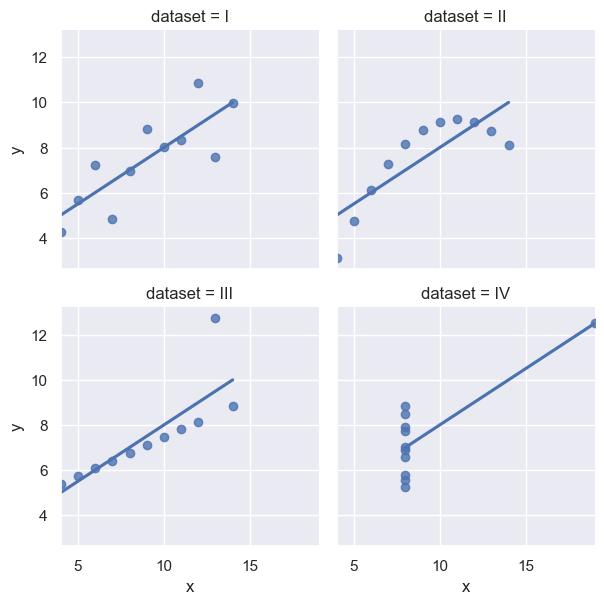

In [218]:
g = sns.lmplot('x', 'y', data=df, col='dataset', ci=None, col_wrap=2, height=3); 
plt.show()

### The task is done!